In [ ]:
!pip install scikit-image matplotlib ipywidgets
!pip install ipympl

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Part 1: Edge Detection


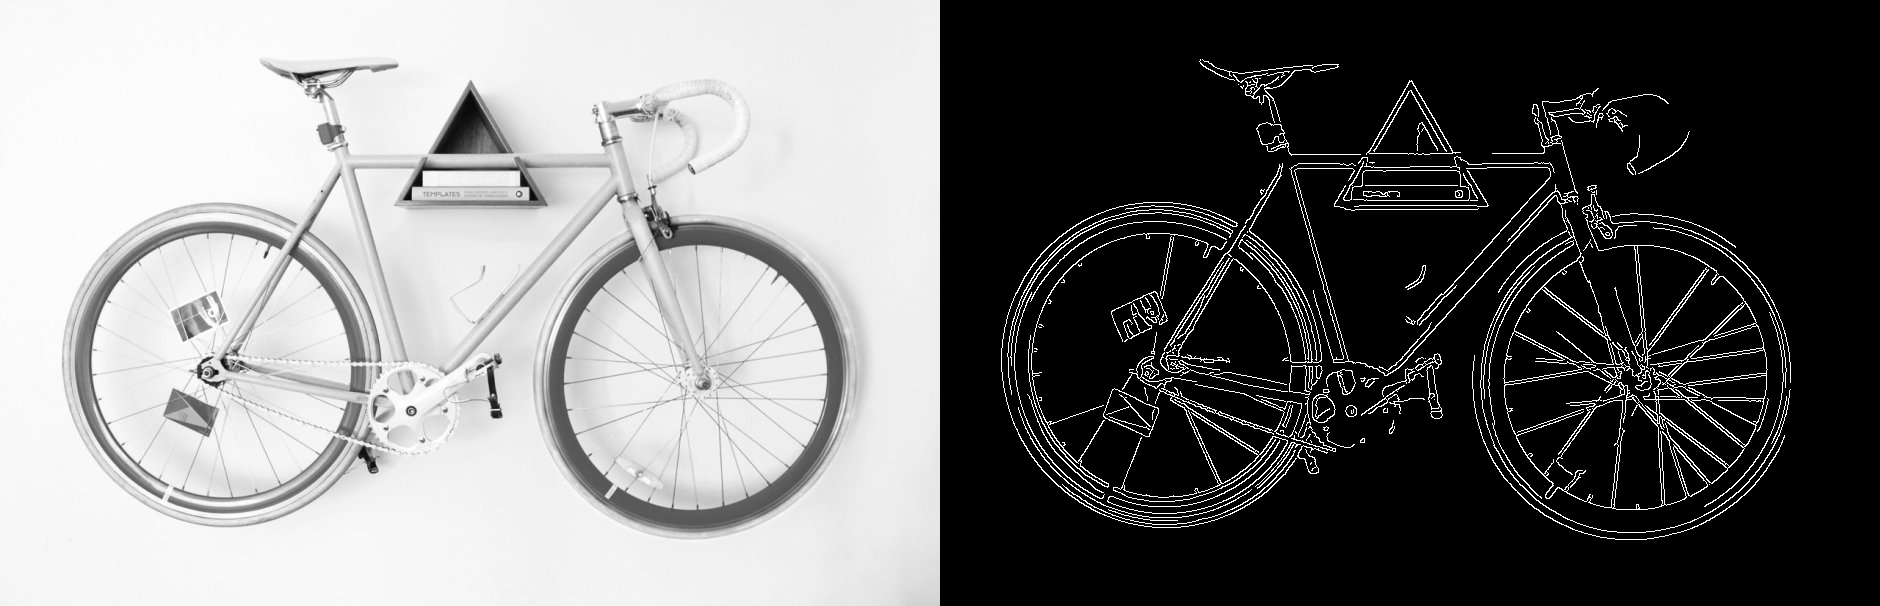

Part 2: Corner Detection


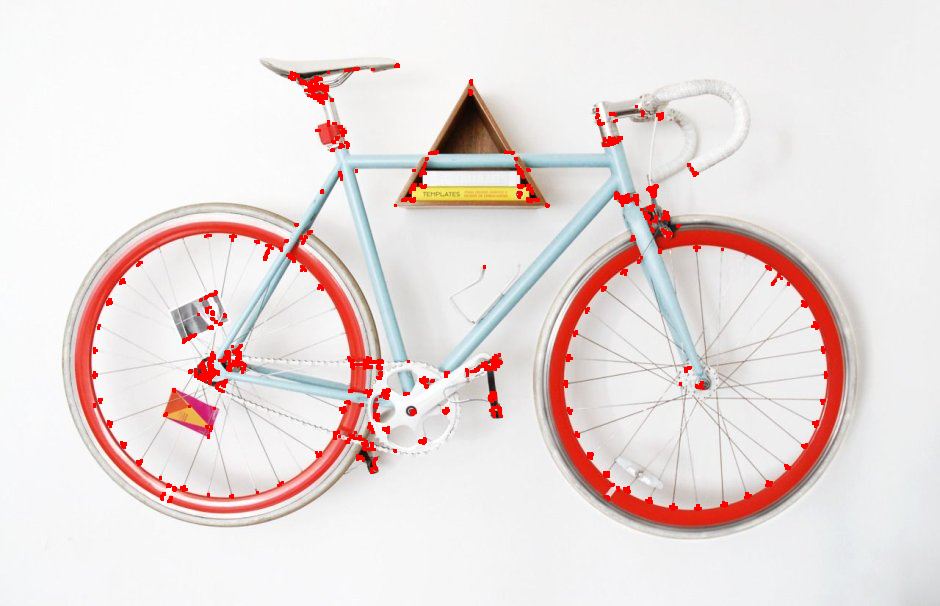

Part 3: Line and Circle Detection


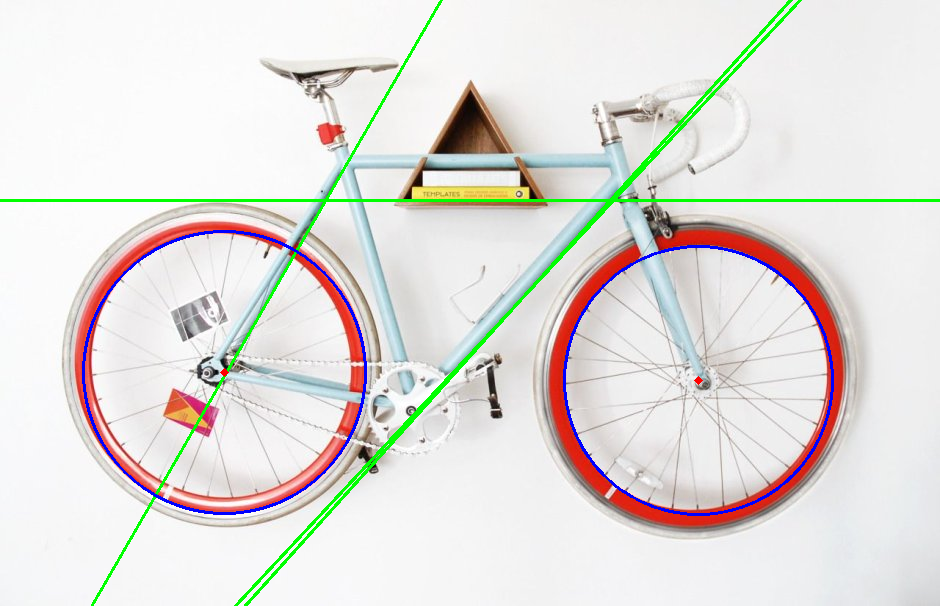

In [5]:
#@title Question 1
from google.colab import drive
from IPython.display import display
from PIL import Image
import os
import cv2
import numpy as np
from IPython.display import display
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')


# Load the image
image = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/edge_analysis/1.jpg')

# Part 1: Edge Detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
combined = np.hstack((cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), edges_color))
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(combined_rgb)
print("Part 1: Edge Detection")
display(pil_image)

# Part 2: Corner Detection
corners = cv2.cornerHarris(blurred, 2, 3, 0.04)
corners = cv2.dilate(corners, None)
image_copy = image.copy()
image_copy[corners > 0.01 * corners.max()] = [0, 0, 255]
image_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(image_rgb)
print("Part 2: Corner Detection")
display(pil_image)

# Part 3: Line and Circle Detection
# Edge detection using Canny
edges = cv2.Canny(blurred, 500, 150)

# Line detection using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Circle detection using Hough Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=400, param2=60, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)
        # Draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Convert the image to RGB (for display purposes)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the OpenCV image to PIL format
pil_image = Image.fromarray(image_rgb)

# Display the image using IPython.display
print("Part 3: Line and Circle Detection")
display(pil_image)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


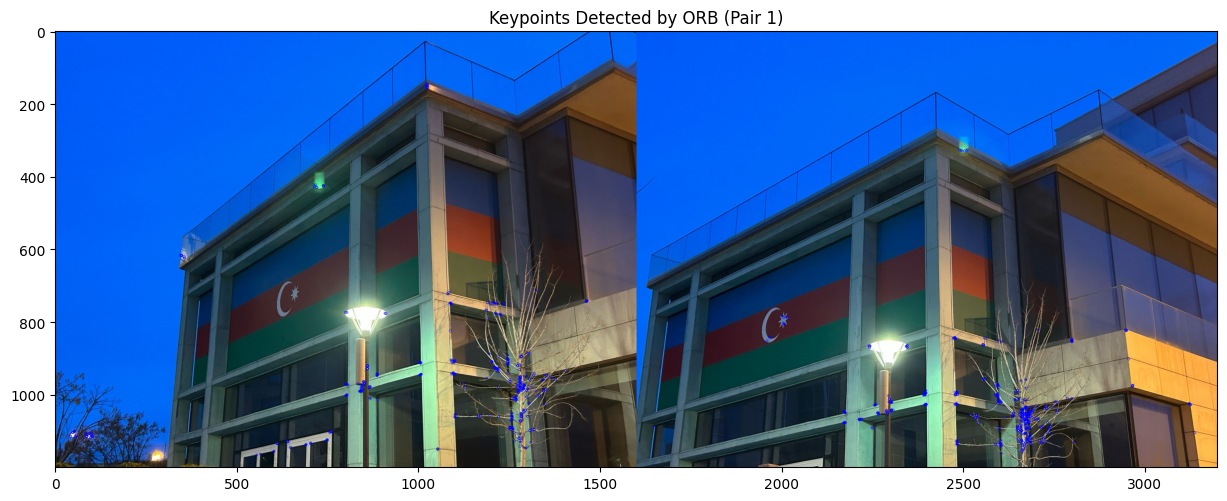

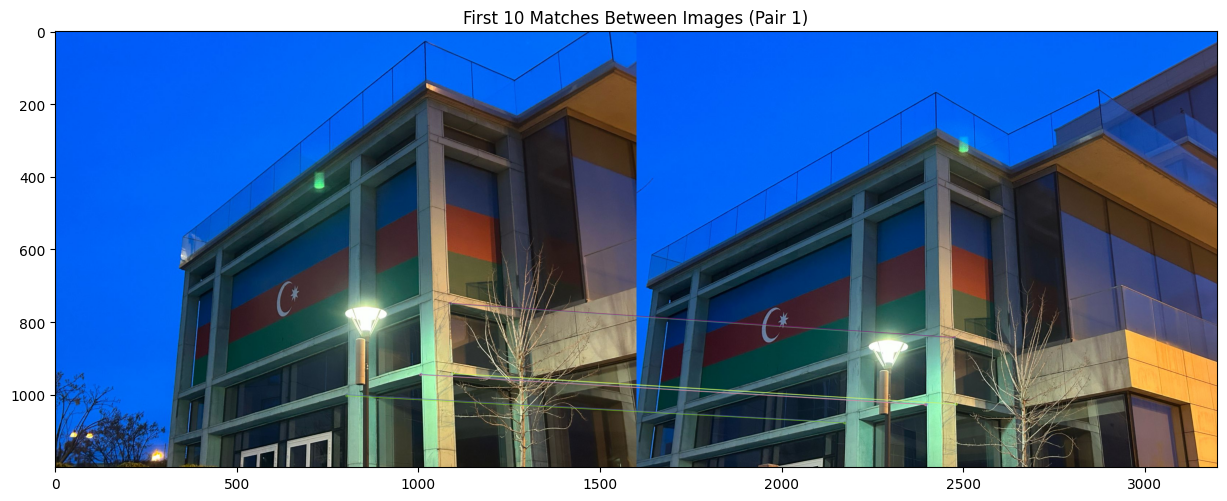

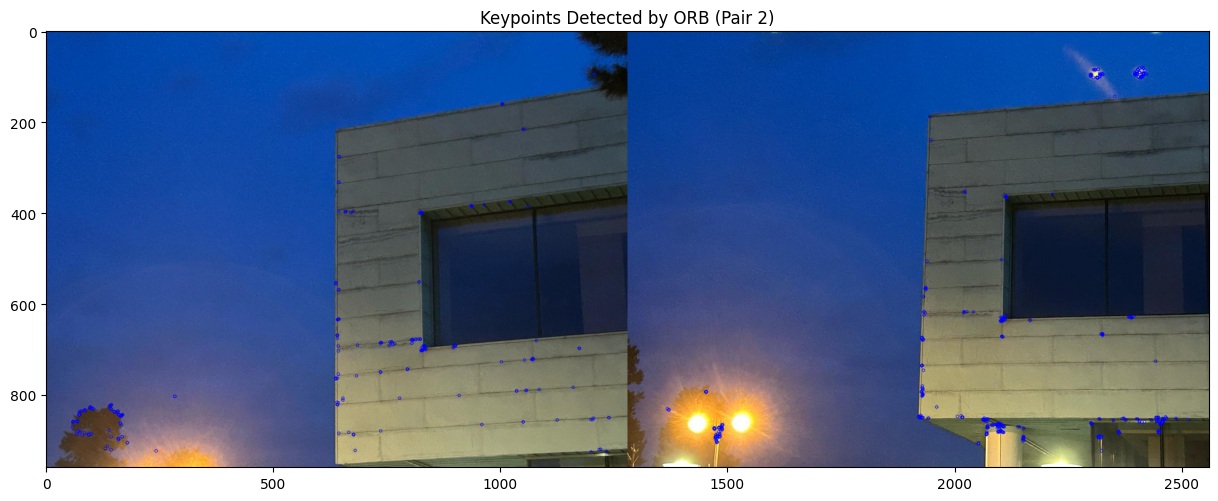

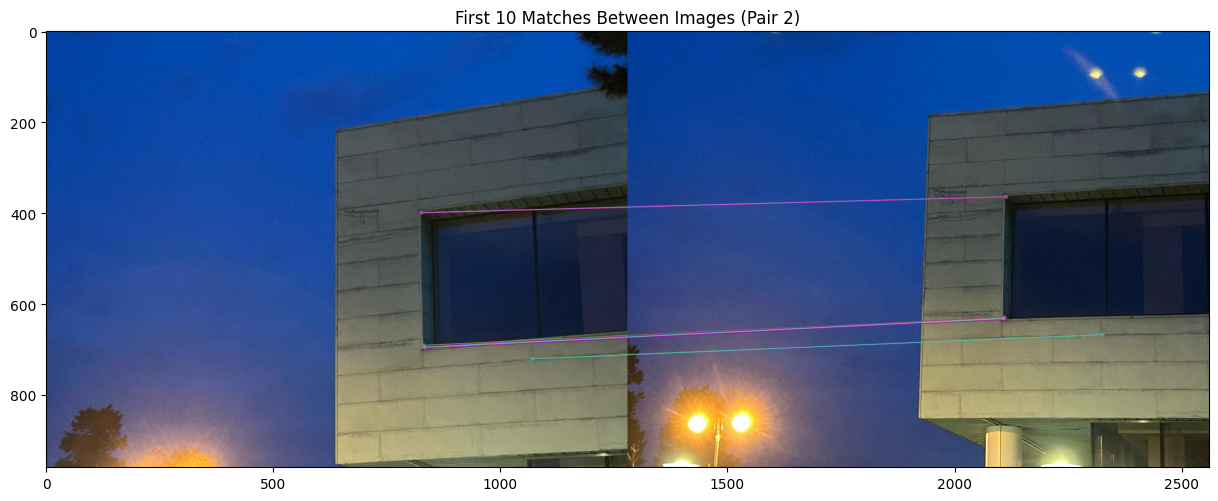

In [8]:
#@title Question 3
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from IPython.display import display
from PIL import Image
import os
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

def match_and_display(image1, image2, title_suffix=''):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in the order of their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], outImg=None, flags=2)

    # Draw keypoints on the images
    keypoint_image1 = cv2.drawKeypoints(image1, keypoints1, None, color=(255, 0, 0), flags=0)
    keypoint_image2 = cv2.drawKeypoints(image2, keypoints2, None, color=(255, 0, 0), flags=0)

    # Combine images horizontally
    combined_image = np.hstack((keypoint_image1, keypoint_image2))

    # Convert BGR to RGB for matplotlib
    combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

    # Display the keypoints
    plt.figure(figsize=(15, 7))
    plt.imshow(combined_image_rgb)
    plt.title(f'Keypoints Detected by ORB {title_suffix}')
    plt.show()

    # Display the matched points
    plt.figure(figsize=(15, 7))
    matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)
    plt.imshow(matched_image_rgb)
    plt.title(f'First 10 Matches Between Images {title_suffix}')
    plt.show()

# Load the images for the first pair
image1a = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/1.jpeg')


image1b = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/2.jpeg')


# Match and display the first pair
match_and_display(image1a, image1b, title_suffix='(Pair 1)')

# Load the images for the second pair
image2a = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/15.jpeg')
image2b = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/16.jpeg')


# Match and display the second pair
match_and_display(image2a, image2b, title_suffix='(Pair 2)')
